In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/ColabNotebooks/
!ls

/content/gdrive/MyDrive/ColabNotebooks
 Acu_def_norm_2020.csv	   'Our COVID-19 code .ipynb'
 Acu_def_norm_2020.gsheet   P_flotante
 AG-COVID.ipynb		    Procesamiento_Datos.ipynb
 AG_SEIRD2.ipynb	    SEIRD.ipynb
 AG_SEIRD2_PM.ipynb	    Simulaciones_AG_3.gdoc
'Copia de AG-COVID.ipynb'   Simulations_PYGAD.gdoc
 data_2015-2019.csv	    test_practice.ipynb
 data_2015-2019.gsheet	    Topics
 datos_2015-2019.csv	   'Variación de parametros.gsheet'
 defunciones.csv


In [ ]:
!pip install pygad

     |████████████████████████████████| 51kB 3.6MB/s 


In [ ]:
import pygad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint # Para resolver las ecuaciones diferenciales
import time


In [ ]:
DATA_DIR = ''
TEST_FILE = ''
MODE = 'NO_ACUM'

#PROCESAMIENTO DE DATOS COVID-19

In [ ]:
#lists useful for data calculations
days_xmonth = [31,28,31,30,31,30,31,31,30,31,30,31]
months = ['Enero', 	'Febrero', 	'Marzo', 	'Abril', 'Mayo', 'Junio', 'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
provincias = ['Chimborazo', 'Cotopaxi', 'Guayas', 'Imbabura', 'Loja', 'Pichincha' ]

In [ ]:
# read data 
df_2 = pd.read_csv('data_2015-2019.csv', index_col='fecha')
df_2
#read data 'defunciones'
defunciones = pd.read_csv('defunciones.csv')



In [ ]:
# mean of months each year 
month_mean = df_2.groupby('provincia').mean()
month_mean

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
provincia,,,,,,,,,,,,
Chimborazo,192.2,194.8,202.8,194.2,196.0,181.8,196.8,190.6,202.2,195.6,182.8,172.4
Cotopaxi,165.4,130.0,147.0,149.4,157.0,141.2,156.8,137.4,137.6,121.8,121.2,120.8
Guayas,1750.2,1610.6,1882.4,1734.6,1735.2,1678.4,1619.8,1640.0,1583.8,1631.0,1626.8,1626.0
Imbabura,175.8,154.6,162.8,159.8,163.2,155.0,157.6,171.2,149.4,152.6,153.6,146.6
Loja,206.8,196.0,196.8,184.8,195.6,180.2,190.0,186.2,182.8,200.6,178.0,159.8
Pichincha,1126.0,963.4,1031.4,1032.8,1050.8,1022.4,1034.0,1027.8,963.6,1033.0,1006.4,1075.4


In [ ]:
# mean per day 
i=0
for month in months:
  #print(month_mean[month] )
  month_mean[month] = month_mean[month]/days_xmonth[i]
  i+=1

month_mean


,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
provincia,,,,,,,,,,,,
Chimborazo,6.200000,6.957143,6.541935,6.473333,6.322581,6.060000,6.348387,6.148387,6.740000,6.309677,6.093333,5.561290
Cotopaxi,5.335484,4.642857,4.741935,4.980000,5.064516,4.706667,5.058065,4.432258,4.586667,3.929032,4.040000,3.896774
Guayas,56.458065,57.521429,60.722581,57.820000,55.974194,55.946667,52.251613,52.903226,52.793333,52.612903,54.226667,52.451613
Imbabura,5.670968,5.521429,5.251613,5.326667,5.264516,5.166667,5.083871,5.522581,4.980000,4.922581,5.120000,4.729032
Loja,6.670968,7.000000,6.348387,6.160000,6.309677,6.006667,6.129032,6.006452,6.093333,6.470968,5.933333,5.154839
Pichincha,36.322581,34.407143,33.270968,34.426667,33.896774,34.080000,33.354839,33.154839,32.120000,33.322581,33.546667,34.690323


In [ ]:
# RC data - mean per day from 2015-2019
for i in range(1,13): 
  
  date = '{}/2020'.format(i).zfill(7)
  #print(date)
  month = defunciones[defunciones['date'].str.contains(date)]
  #print(month)
  for prov in provincias:
      
     past_data = month_mean.loc[prov,months[i-1]]
     defunciones.loc[defunciones['date'].str.contains(date),prov]= month[prov]- past_data
  #   defunciones[defunciones['date'].str.contains(date)] = month
  

defunciones

,date,Chimborazo,Cotopaxi,Guayas,Imbabura,Loja,Pichincha
0,01/01/2020,0.80000,0.664516,21.541935,3.329032,2.329032,6.677419
1,02/01/2020,-1.20000,-3.335484,23.541935,0.329032,-0.670968,-0.322581
2,03/01/2020,1.80000,-3.335484,16.541935,1.329032,0.329032,10.677419
3,04/01/2020,3.80000,-3.335484,2.541935,1.329032,-2.670968,10.677419
4,05/01/2020,2.80000,0.664516,13.541935,1.329032,2.329032,1.677419
...,...,...,...,...,...,...,...
361,27/12/2020,-0.56129,5.103226,19.548387,-3.729032,-0.154839,8.309677
362,28/12/2020,6.43871,7.103226,30.548387,-1.729032,1.845161,14.309677
363,29/12/2020,5.43871,0.103226,15.548387,2.270968,-1.154839,14.309677
364,30/12/2020,2.43871,4.103226,16.548387,1.270968,-0.154839,18.309677


In [ ]:
#Interchance negative numbers by 0
datos = defunciones._get_numeric_data()
datos[datos < 0] = 0

datos

,Chimborazo,Cotopaxi,Guayas,Imbabura,Loja,Pichincha
0,0.80000,0.664516,21.541935,3.329032,2.329032,6.677419
1,0.00000,0.000000,23.541935,0.329032,0.000000,0.000000
2,1.80000,0.000000,16.541935,1.329032,0.329032,10.677419
3,3.80000,0.000000,2.541935,1.329032,0.000000,10.677419
4,2.80000,0.664516,13.541935,1.329032,2.329032,1.677419
...,...,...,...,...,...,...
361,0.00000,5.103226,19.548387,0.000000,0.000000,8.309677
362,6.43871,7.103226,30.548387,0.000000,1.845161,14.309677
363,5.43871,0.103226,15.548387,2.270968,0.000000,14.309677
364,2.43871,4.103226,16.548387,1.270968,0.000000,18.309677


In [ ]:
dic_provincias = {provincia: np.array(datos[provincia]) for provincia in provincias}


In [ ]:
dic_test = {1: 35, 'dos':70}
for k,v in dic_test.items(): 
  print(k,v)

print(dic_test.get(7))

1 35
dos 70
None


In [ ]:
'''# Data acollation by province
Chimborazo = np.array(datos["Chimborazo"])
Cotopaxi = np.array(datos["Cotopaxi"])
Guayas = np.array(datos["Guayas"])
Imbabura = np.array(datos["Imbabura"])
Loja = np.array(datos["Loja"])
Pichincha = np.array(datos["Pichincha"])

'''

In [ ]:
#Select province ans define data
province = Guayas
#data = np.cumsum(province)
data = province
dias = np.arange(0,len(data), dtype=np.float)


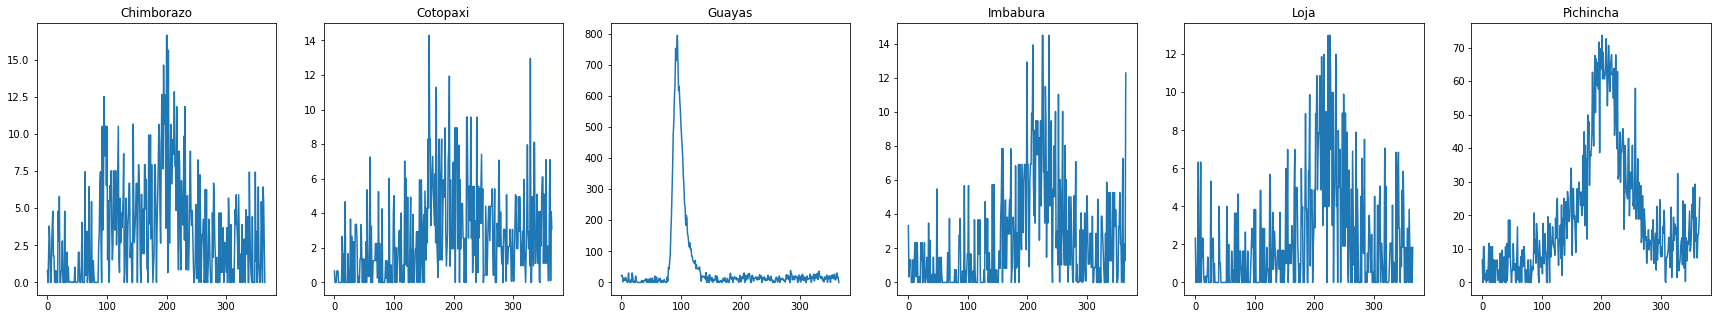

In [ ]:
fig, ax = plt.subplots( 1, len(dic_provincias),  figsize = (30,5))
i= 0
for k, v in dic_provincias.items(): 
  ax[i].plot(dias, v)
  ax[i].set_title(k)
  i+=1

#matriz[i][j]; 2 for
#plt.plot(dias, data)


# MATHEMATICAL SEIRD MODEL

###Initial conditions

In [ ]:
NI = 4387434. # Numero de habitantes
#524004  # Chimborazo
#488716  # Cotopaxi
#4387434 # Guayas 
#476257  # Imbabura
#521154  # Loja
#3228233 # Pichincha


# Numero inicial de infectados
I0 = 1.

# Nuevo vector con las con las condiciones iniciales para la función que resuelve las ecuaciones direrenciales
y_initial = [NI, 0, I0, 0, 0]

### SEIRD Model

In [ ]:
# Necesito hacer esto para que la función odeint funcione.
def Diff_Equ(y_t, t, sigma, gamma, beta, f):
   

    
    """ A simple model for covid spread """
    # sigma Rate of becoming infections after contact with the exposed(unit in [day]**-1)
    # gamma Rate of either dying or recovering(unit in [day]**-1) 
    # beta Attack(contact) rate, those who can infect others(unit [day]**-1[person]**-1)
    # f fatality rate,f% of infected people will die and (1-f)% will survive(recovered)
    S, E, I, R, D = y_t
    Nn = S+E+I+R # Total still alive
    # I think in this model we must divide by Nn and not by N because those who still alive will influence 
    # more than the totlal population to our model(over time you will get my point i guess) 
    # The model equations
    dS_dt = -beta*(S/Nn)*I
    dE_dt = +beta*(S/Nn)*I - sigma*E
    dI_dt = sigma*E - gamma*I
    dR_dt = (1.0-f)*gamma*I
    dD_dt = f*gamma*I
    return [dS_dt, dE_dt, dI_dt, dR_dt, dD_dt]
    

### Fitness function

In [ ]:
'''arra = np.array([1,8,10])
D_no_cu = get_no_acum(arra)
D_no_cu
'''

array([1, 7, 2])

In [ ]:
def get_no_acum(D):
  D_no_acu = D.copy()
  for i in range (1,len(D)): 
    D_no_acu[i] = D[i]-D[i-1]

  return D_no_acu 
  

In [ ]:
def fitness_func(solution, solution_idx):
  sigma, gamma, beta, f = solution
  Solve = odeint(Diff_Equ, y_initial, dias, args=(sigma, gamma, beta, f) )
  S,E,I,R,D = [Solve[:,i] for i in range(5)]# lista de 5 arrays
  #print("S: {} - {}".format(np.amax(S),np.min(S))) 
  #print("E: {} - {}".format(np.amax(E),np.min(E))) 
  #print("I: {} - {}".format(np.amax(I),np.min(I))) 
  #print("R: {} - {}".format(np.amax(R),np.min(R))) 
  #print("D: {} - {}".format(np.amax(D),np.min(D)))

  D_no_acu = get_no_acum(D)
  
  
  fitness = 1/(1+np.sum(np.square(D_no_acu-data)))
  return fitness

### GA conditions

In [ ]:
fitness_function = fitness_func

num_generations = 100  # 1000
num_parents_mating = 2

num_individuos = 50    # 200          
num_genes = 4          # numero de genes -> num parameters
gene_space = [{'low': 0, 'high': 1}, {'low': 0, 'high': 1}, {'low': 0, 'high': 1}, {'low': 0, 'high': 1}]

# the paraters are in the interval [0,1]
init_range_low  = 0
init_range_high = 1

# SELECTION
parent_selection_type = "tournament" # rws: roulette wheel selection
                              # sss: steady-state selection
                              # rank : rank selection
                              # random : random selection
                              # tournament: tournament selection
                              #  K_tournament = 3: specifies the number of parents participating in the tournament selection. It defaults to 3

K_tournament = 3
keep_parents = 1

#CROSSOVER
crossover_type = "uniform"      # two_points: two_points
                                # uniform: uniform crossover
                                # scattered: scattered crossover
                                # single_point
                                #crossover_probability=None


#MUTATION

#mutation_type = "random"       #swap
                                #inversion
                                #scramble
                                #adaptive

#mutation_probability = 0.4

'''
ADAPTATIVE MUTATION 
#Using one of these 3 parameters according: 
 
# mutation_probability
mutation_probability = [0.25, 0.1]

# mutation_num_genes
mutation_num_genes = [4, 2]

# mutation_percent_genes
mutation_percent_genes = [25, 12]

It can be list, tuple or np.array
'''
mutation_type="adaptive"
mutation_probability=[0.8, 0.2]

In [ ]:
def callback_gen(ga_instance):
    template = "Generation: {} - Sol indx: {} - Fitness of the best solution : {} - ind: {}"
    #print(ga_instance.population.shape)
    print(template.format(ga_instance.generations_completed,
                          ga_instance.best_solution()[2],
                          ga_instance.best_solution()[1],
                          ga_instance.best_solution()[0],
                          ))


###Create instance for GA

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=num_individuos,
                       num_genes=num_genes,
                       gene_space = gene_space,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       K_tournament = K_tournament,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=callback_gen)

In [ ]:
ga_temporal = ga_instance

### Cicle to run the code 

Generation: 1 - Sol indx: 0 - Fitness of the best solution : 1.382959084679411e-07 - ind: [0.01129608 0.21070938 0.76470958 0.09375142]
Generation: 2 - Sol indx: 23 - Fitness of the best solution : 1.3850674687912503e-07 - ind: [0.45462267 0.85227015 0.90584258 0.16031922]
Generation: 3 - Sol indx: 39 - Fitness of the best solution : 1.3856226464151237e-07 - ind: [0.77655332 0.46610092 0.49006487 0.87177496]
Generation: 4 - Sol indx: 0 - Fitness of the best solution : 1.3856226464151237e-07 - ind: [0.77655332 0.46610092 0.49006487 0.87177496]
Generation: 5 - Sol indx: 29 - Fitness of the best solution : 1.3880993064705953e-07 - ind: [0.47868911 0.46610092 0.49006487 0.87177496]
Generation: 6 - Sol indx: 43 - Fitness of the best solution : 1.3892393133974615e-07 - ind: [0.66742369 0.46610092 0.49006487 0.87177496]
Generation: 7 - Sol indx: 0 - Fitness of the best solution : 1.3892393133974615e-07 - ind: [0.66742369 0.46610092 0.49006487 0.87177496]
Generation: 8 - Sol indx: 0 - Fitness 

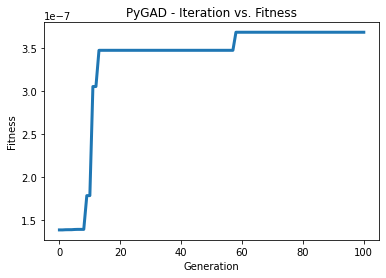

Parameters of the best solution : [0.22028177 0.22822827 0.71795318 0.00180332]
Fitness value of the best solution = 3.685213302592311e-07


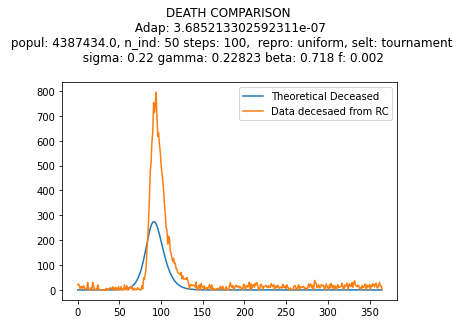

Generation: 1 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 2 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 3 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 4 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 5 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 6 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 7 - Sol indx: 0 - Fitness of the best solution : 3.685213302592311e-07 - ind: [0.22028177 0.22822827 0.71795318 0.00180332]
Generation: 8 - Sol indx: 0 - Fitness of the bes

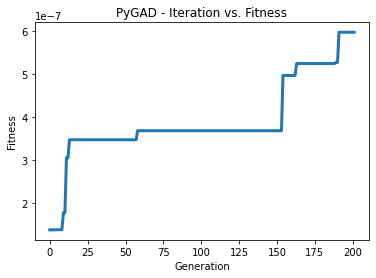

Parameters of the best solution : [0.19740027 0.08028266 0.49502493 0.00263036]
Fitness value of the best solution = 5.970022691559861e-07


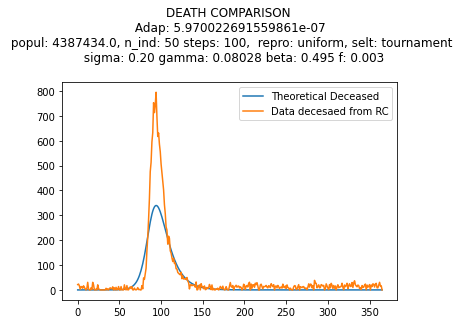

Generation: 1 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 2 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 3 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 4 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 5 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 6 - Sol indx: 0 - Fitness of the best solution : 5.970022691559861e-07 - ind: [0.19740027 0.08028266 0.49502493 0.00263036]
Generation: 7 - Sol indx: 36 - Fitness of the best solution : 1.2545931419010027e-06 - ind: [0.19740027 0.08028266 0.49502493 0.0041506 ]
Generation: 8 - Sol indx: 0 - Fitness of the b

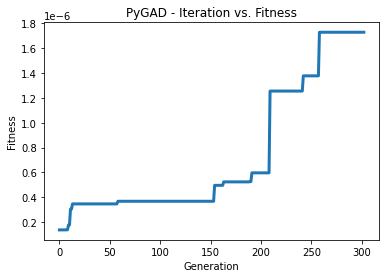

Parameters of the best solution : [0.96491972 0.30013999 0.52993669 0.00572609]
Fitness value of the best solution = 1.727456042260788e-06


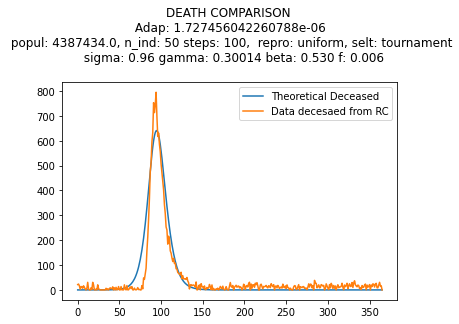

Generation: 1 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 2 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 3 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 4 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 5 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 6 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 7 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 8 - Sol indx: 0 - Fitness of the bes

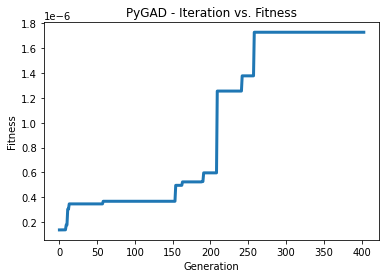

Parameters of the best solution : [0.96491972 0.30013999 0.52993669 0.00572609]
Fitness value of the best solution = 1.727456042260788e-06


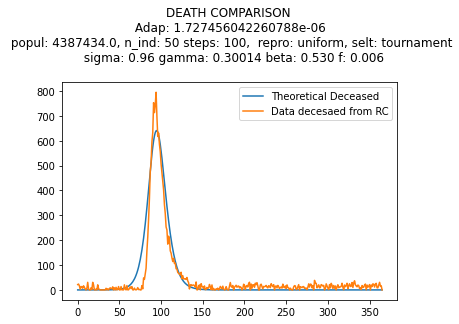

Generation: 1 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 2 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 3 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 4 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 5 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 6 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 7 - Sol indx: 0 - Fitness of the best solution : 1.727456042260788e-06 - ind: [0.96491972 0.30013999 0.52993669 0.00572609]
Generation: 8 - Sol indx: 0 - Fitness of the bes

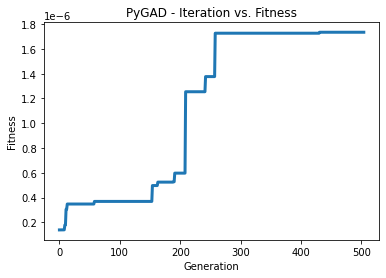

Parameters of the best solution : [0.95221009 0.30013999 0.52993669 0.00572609]
Fitness value of the best solution = 1.735231961139303e-06


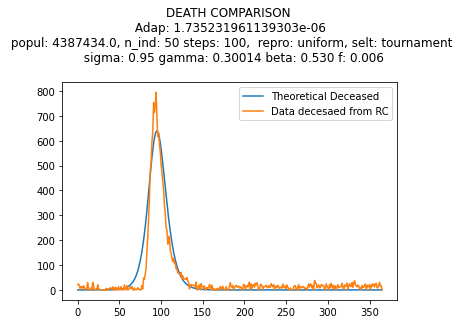

In [ ]:
for i in range(0, 5):
  # Inicialización de la semilla aleatoria
  t = time.time()
  ga_instance.run()
  tt = time.time()
  print("AG = ", i, "   tiempo = ", (tt-t)/60, "minutos" )
  ga_instance.plot_result()
  solution, solution_fitness, solution_idx = ga_instance.best_solution()
  print("Parameters of the best solution : {solution}".format(solution=solution))
  print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
  sigma, gamma, beta, f = solution
  Solve = odeint(Diff_Equ, y_initial, dias, args=(sigma, gamma, beta, f) )
  Ss,Ee,Ii,Rr,Dd = [Solve[:,i] for i in range(5)]
  D_no_acu =  get_no_acum(Dd)
  plt.plot(dias, D_no_acu, label="Theoretical Deceased")
  #plt.plot(dias, Dd, label="Theoretical Deceased")
  plt.plot(dias,data, label ='Data decesaed from RC')
  plt.title('DEATH COMPARISON \n Adap: {} \n popul: {}, n_ind: {} steps: {},  repro: {}, selt: {}\n  sigma: {:.2f} gamma: {:.5f} beta: {:.3f} f: {:.3f}\n'.format(solution_fitness, NI,num_individuos, num_generations, crossover_type,parent_selection_type, sigma, gamma, beta, f))
  plt.legend(loc='best')
  plt.show()


### Individual run

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
'''
prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))
'''

Parameters of the best solution : [0.0816031  0.05852152 0.93614917 0.00358978]
Fitness value of the best solution = 1.5668506083530675e-09


'\nprediction = np.sum(np.array(function_inputs)*solution)\nprint("Predicted output based on the best solution : {prediction}".format(prediction=prediction))\n'

In [ ]:
sigma, gamma, beta, f = solution
Solve = odeint(Diff_Equ, y_initial, dias, args=(sigma, gamma, beta, f) )
Ss,Ee,Ii,Rr,Dd = [Solve[:,i] for i in range(5)]

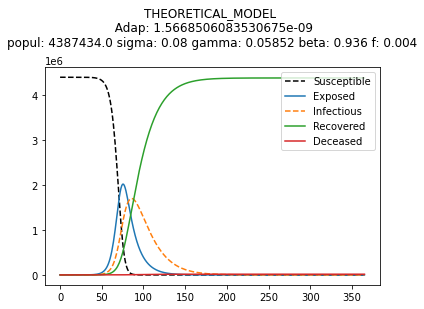

In [ ]:

plt.plot(dias, Ss, 'k--', label="Susceptible")
plt.plot(dias, Ee, label="Exposed")
plt.plot(dias, Ii, '--', label="Infectious")
plt.plot(dias, Rr, label="Recovered")
plt.plot(dias, Dd, label="Deceased")
plt.title('THEORETICAL_MODEL \n  Adap: {} \npopul: {} sigma: {:.2f} gamma: {:.5f} beta: {:.3f} f: {:.3f}\n'.format(solution_fitness, NI, sigma, gamma, beta, f))
plt.legend(loc='upper right')


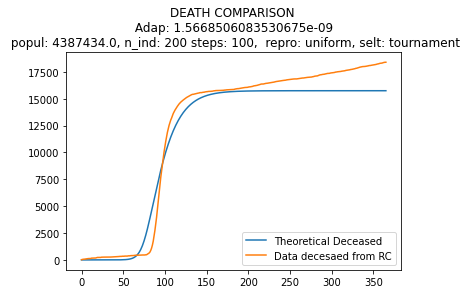

In [ ]:
plt.plot(dias, Dd, label="Theoretical Deceased")
plt.plot(dias,data, label ='Data decesaed from RC')
plt.title('DEATH COMPARISON \n Adap: {} \n popul: {}, n_ind: {} steps: {},  repro: {}, selt: {}'.format(solution_fitness, NI,num_individuos, num_generations, crossover_type,parent_selection_type))
plt.legend(loc='best')
plt.show()

#PLOTS OF DATA PROVINCE

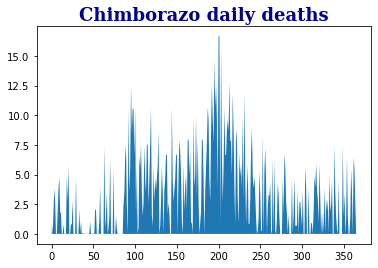

In [ ]:
# Chimborazo graphic
plt.fill_between(dias,Chimborazo)
plt.title("Chimborazo daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.show()

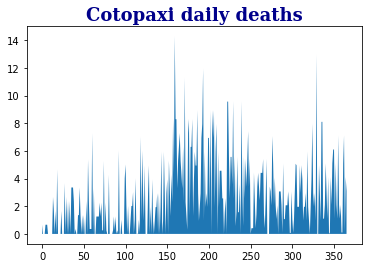

In [ ]:
# Cotopaxi graphic
plt.fill_between(dias,Cotopaxi)
plt.title("Cotopaxi daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

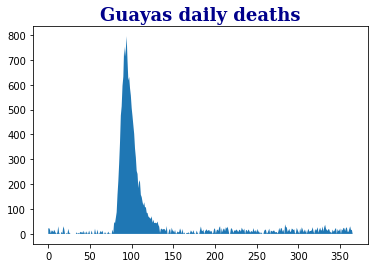

In [ ]:
#Guayas graphic
plt.fill_between(dias,Guayas)
plt.title("Guayas daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

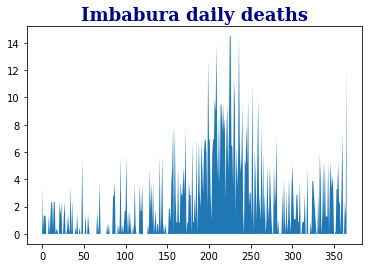

In [ ]:
#Imbabura graphic
plt.fill_between(dias,Imbabura)
plt.title("Imbabura daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

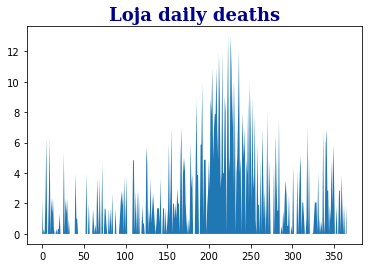

In [ ]:
#Loja graphic
plt.fill_between(dias,Loja)
plt.title("Loja daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

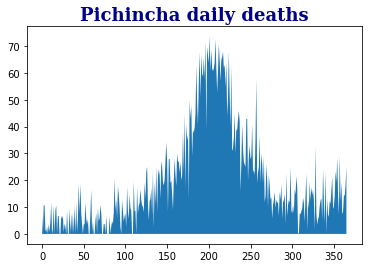

In [ ]:
#Pichincha graphic
plt.fill_between(dias,Pichincha)
plt.title("Pichincha daily deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

In [ ]:
# Accumulated data
Chimb_acu = np.cumsum(Chimborazo)
Coto_acu = np.cumsum(Cotopaxi)
Guayas_acu = np.cumsum(Guayas)
Imb_acu = np.cumsum(Imbabura)
Loja_acu = np.cumsum(Loja)
Pich_acu = np.cumsum(Pichincha)




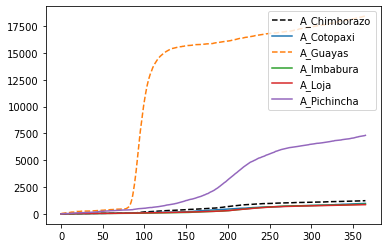

In [ ]:
#All plots accumulated data
plt.plot(dias, Chimb_acu, 'k--', label="A_Chimborazo")
plt.plot(dias, Coto_acu, label="A_Cotopaxi")
plt.plot(dias, Guayas_acu, '--', label="A_Guayas")
plt.plot(dias, Imb_acu, label="A_Imbabura")
plt.plot(dias, Loja_acu, label="A_Loja")
plt.plot(dias, Pich_acu, label="A_Pichincha")

plt.legend(loc='upper right')

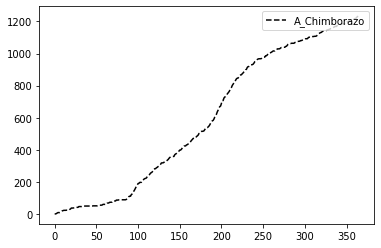

In [ ]:
#Each accumulated data
plt.plot(dias, Chimb_acu, 'k--', label="A_Chimborazo")
plt.legend(loc='upper right')


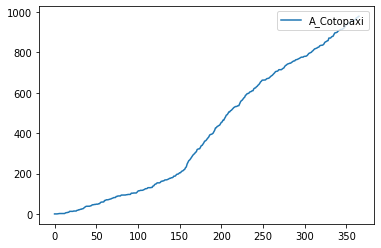

In [ ]:
plt.plot(dias, Coto_acu, label="A_Cotopaxi")
plt.legend(loc='upper right')


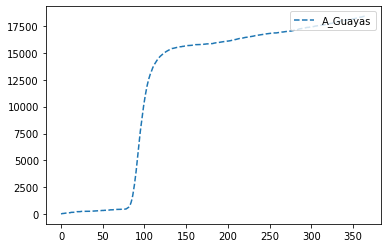

In [ ]:
plt.plot(dias, Guayas_acu, '--', label="A_Guayas")
plt.legend(loc='upper right')


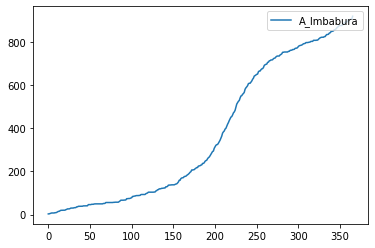

In [ ]:
plt.plot(dias, Imb_acu, label="A_Imbabura")
plt.legend(loc='upper right')


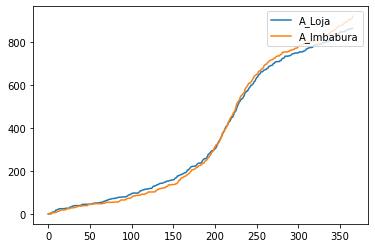

In [ ]:
plt.plot(dias, Loja_acu, label="A_Loja")
plt.plot(dias, Imb_acu, label="A_Imbabura")
plt.legend(loc='upper right')


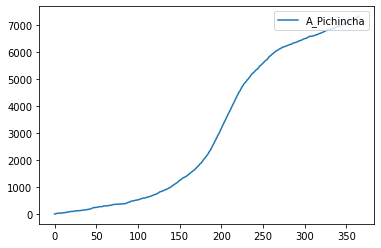

In [ ]:
plt.plot(dias, Pich_acu, label="A_Pichincha")
plt.legend(loc='upper right')